# Music Collection Analysis

## Import Database

In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from tqdm import notebook
import ipywidgets as widgets

Traktor génère un fichier `.nml` à renomer en `.xml` et supprimer les champs inutiles. 

In [2]:
file = "Traktor_export/Full.xml"
xml_data = open(file, 'r', encoding="utf8").read()  # Read file
root = ET.XML(xml_data)  # Parse XML

In [3]:
data = []
cols = []
for node in root:
    s_title = node.attrib.get("TITLE")
    s_artist = node.attrib.get("ARTIST")
    
    info = node.find("INFO")
    s_genre = info.attrib.get("GENRE") #if node is not None else None
    s_genre = s_genre#.split(", ")
    s_power = int(info.attrib.get("COMMENT"))
    s_key = info.attrib.get("KEY")
    
    temp = node.find("TEMPO")
    s_bpm = float(node.find("TEMPO").attrib.get("BPM")) if temp is not None else None
    
    data.append({"title":s_title, "artist":s_artist, "genre":s_genre, 
                "power":s_power, "key":s_key, "bpm":s_bpm})
    
    
df_tracks = pd.DataFrame(data)  # Write in DF and transpose it

In [4]:
playlist = "Full"

In [5]:
# Export dataframe to csv

df_tracks.to_csv(f"music_data/{playlist}_tracks.csv", index=False, sep=";")

## POWER

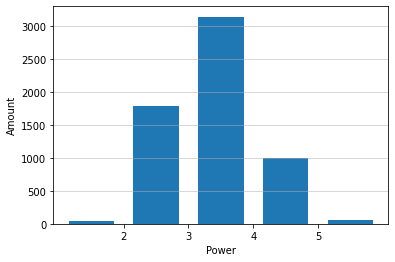

In [6]:
bin_edges = np.arange(1,7, 1)
plt.hist(df_tracks["power"], bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 6, 1))

plt.xlabel("Power")
plt.ylabel("Amount")
plt.grid(axis="y", linewidth=.5)

In [7]:
#powers = df["power"].value_counts().sort_index()

## Genre
### Genre Count

In [8]:
genre = df_tracks['genre'].str.split(", ", expand=True)
#genre["title"] = df["title"]

# shift column 'Name' to first position
#first_column = genre.pop('title')
#genre.insert(0, 'title', first_column)

In [9]:
# Export dataframe to csv
genre.to_csv(f"music_data/{playlist}_genres.csv", index=False, sep=";")

In [10]:
genreCount = genre.apply(pd.Series.value_counts)
genreCount = genreCount.sum(axis=1, skipna=True)
type(genreCount)

pandas.core.series.Series

In [11]:
# Export dataframe to csv
genreCount.name = "Occurence"
genreCount.to_csv(f"music_data/{playlist}_genresCount.csv", sep=";")

<AxesSubplot:>

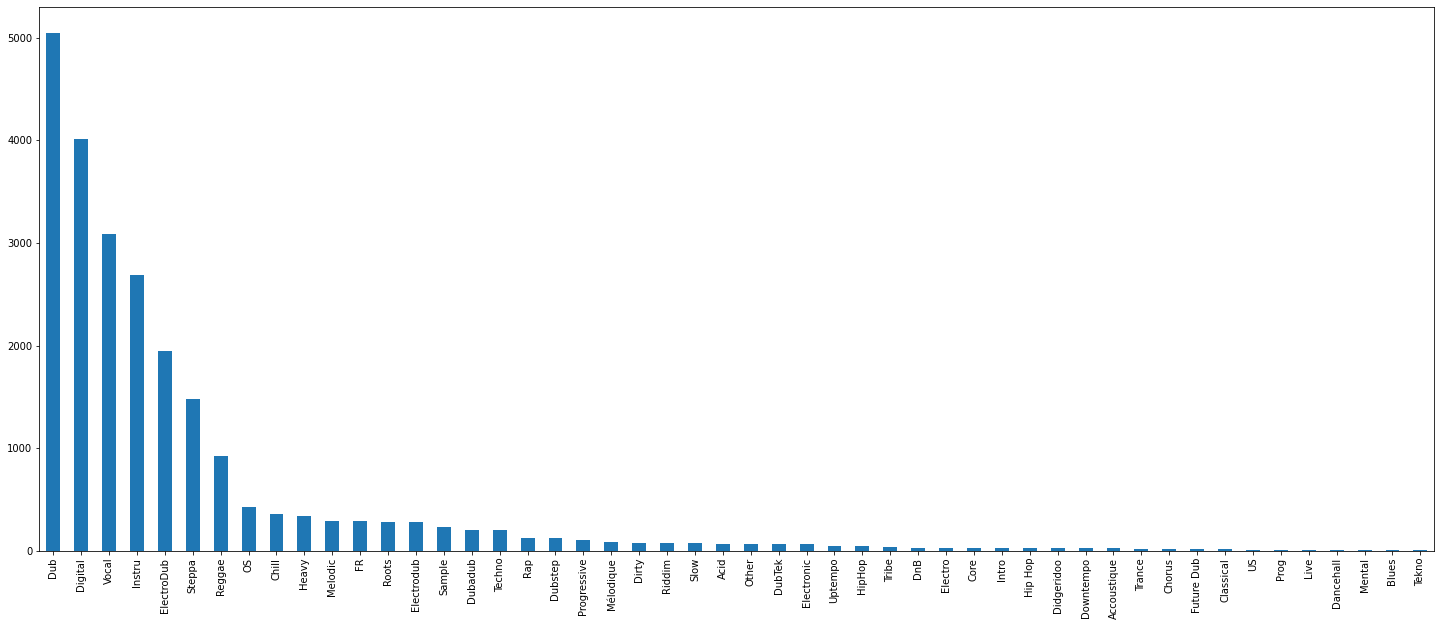

In [12]:
genreCount.sort_values(ascending=False)[0:50].plot(kind='bar', figsize=(25,10))

### Genre Relationship

In [14]:
column_names = ["Source", "Target"]

df_links = pd.DataFrame(columns = column_names)

for index, row in notebook.tqdm(genre.iterrows()):
    for i, item in enumerate(row):
        if item != None:
            for j, item2 in enumerate(row):
                if item2 != None and item!=item2 and j>i:
                    temp = pd.DataFrame({"Source": [item], "Target":[item2]})
                    df_links = pd.concat([df_links, temp])

# Export dataframe to csv
df_links.to_csv(f"music_data/{playlist}_genresLinks.csv", sep=";", index=False)   

0it [00:00, ?it/s]

## Artist
### Artist Count
Occurence of each artist

In [32]:
artist = df_tracks['artist'].str.split(", ", expand=True)

In [33]:
artistCount = artist.apply(pd.Series.value_counts)
artistCount = artistCount.sum(axis=1, skipna=True)

<AxesSubplot:>

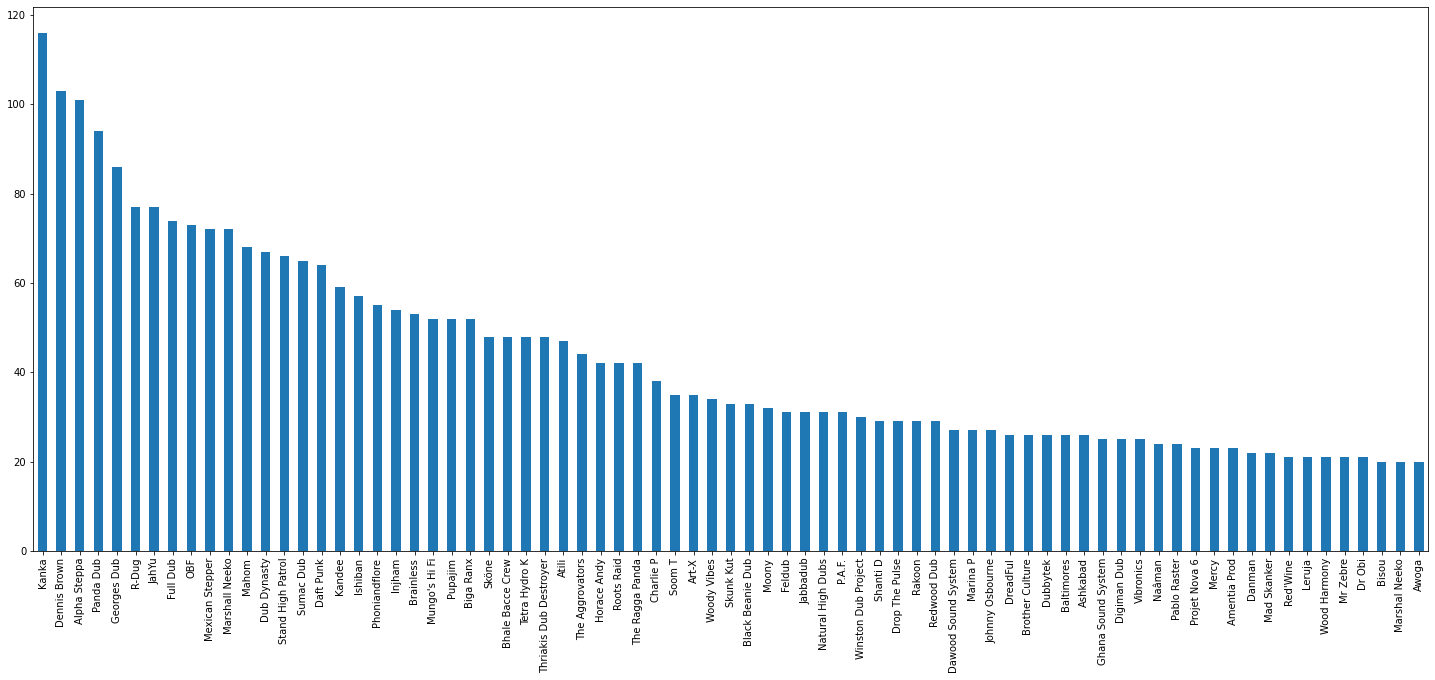

In [34]:
artistCount.sort_values(ascending=False)[0:75].plot(kind='bar', figsize=(25,10))

### Artist relationship
Link 2 artist when they are on the same song
- Link count
- Map

In [36]:
column_names = ["Source", "Target"]

df_links = pd.DataFrame(columns = column_names)

for index, row in notebook.tqdm(artist.iterrows()):
    for i, item in enumerate(row):
        if item != None:
            for j, item2 in enumerate(row):
                if item2 != None and item!=item2 and j>i:
                    temp = pd.DataFrame({"Source": [item], "Target":[item2]})
                    df_links = pd.concat([df_links, temp])

# Export dataframe to csv
df_links.to_csv(f"music_data/{playlist}_artistsLinks.csv", sep=";", index=False)   

0it [00:00, ?it/s]